# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudlent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [4]:
import pandas as pd

data = pd.read_csv("data/creditcard.csv")

data.head()
data = data.sample(frac=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
686,-0.458352,-0.358400,1.070412,-2.337933,-0.243453,-1.471496,0.182482,-0.313823,-2.759820,0.830098,...,-0.064310,0.048805,-0.205327,0.324924,0.314862,-0.224625,0.054299,0.098412,15.00,0
22925,-4.460076,-4.786844,1.293340,-1.560531,1.474213,-1.569017,-1.764973,0.524336,-1.474864,1.148590,...,-0.373745,0.398534,3.086143,-0.904276,1.246212,0.027264,0.409119,-0.578668,18.00,0
15391,-0.989308,1.249124,1.533433,1.036101,0.394908,0.096425,1.164196,-0.527983,0.902511,1.591126,...,-0.292850,0.229932,-0.193181,0.069090,-0.037756,-0.302932,0.117071,-0.244300,17.95,0
14246,-1.856074,1.661711,-2.229579,-0.209997,3.000181,3.882295,-0.702753,-1.655826,-1.303062,-0.269038,...,-1.057132,0.688611,-0.005392,0.687208,0.015625,-0.507456,-0.648173,0.200531,21.00,0
13766,1.041702,0.116258,0.335771,1.186276,-0.341690,-0.876273,0.378113,-0.281082,-0.143126,-0.086754,...,-0.103916,-0.469856,-0.054624,0.373814,0.467501,-0.565289,0.006127,0.045505,104.64,0


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
data['Class'].sum()/len(data)

0.0017204452090867595

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(data[['Amount']])
data['Amount'] = mms.transform(data[['Amount']])

target = 'Class'
features = list(data.columns)
features.remove(target)

X = data[features]
y = data[target]

In [15]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')

cross_val_predict(model, X, y, method = "predict_proba")

array([[9.99996732e-01, 3.26792219e-06],
       [9.99999687e-01, 3.13452797e-07],
       [9.99999783e-01, 2.17461239e-07],
       ...,
       [9.99974838e-01, 2.51621573e-05],
       [9.99999854e-01, 1.45895678e-07],
       [9.99999987e-01, 1.34540024e-08]])

In [16]:
data['prob_ok'], data['prob_fraud'] = cross_val_predict(model,
                                                       X,
                                                       y,
                                                       method = "predict_proba").T

precision, recall, thresold = precision_recall_curve(y, data['prob_fraud'])

In [17]:
scores = pd.DataFrame({"thresold":thresold,
                       "precision":precision[:-1],
                       "recall":recall[:-1]})

scores

,thresold,precision,recall
0,1.147423e-17,0.001739,1.000000
1,1.181522e-17,0.001704,0.979592
2,1.181976e-17,0.001704,0.979592
3,1.184043e-17,0.001704,0.979592
4,1.188821e-17,0.001704,0.979592
...,...,...,...
28102,1.000000e+00,0.764706,0.265306
28103,1.000000e+00,0.750000,0.244898
28104,1.000000e+00,0.800000,0.244898
28105,1.000000e+00,0.785714,0.224490


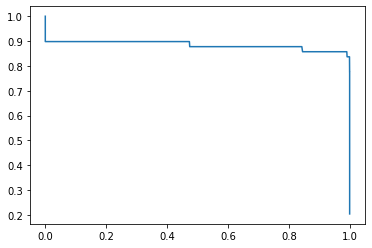

In [18]:
plt.plot(scores['thresold'],scores['recall'])

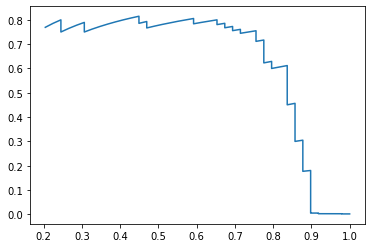

In [19]:
plt.plot(scores['recall'],scores['precision'])

In [23]:
new_threshold = scores[scores['recall'] >= 0.88].thresold.max()
new_threshold

0.47347863927297634